In [1]:
import requests
import json
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import os
from config_car import api_key
from config_car import gkey

# Pull csv with business IDs
busIDs_file = 'restaurantIDs.csv'
bus_ids = pd.read_csv(busIDs_file)
bus_ids

,Business_ID
0,y6Y5M0sjwfPlDOOs4A_mcQ
1,pDr9PC7jD7LBnLgJxD_4wQ
2,VvYtvrRnKJ8UUvJbRHYV5Q
3,uqbIttno2vux1wW1mpyvgw
4,BMyK4sreXs6ER5k1WAosBQ
...,...
212,fNIpqMrqUg5Wr9-XYNDlVw
213,YeAoTh417Lbpx5MStmkt-Q
214,yyqZeTHfK513xOPLnof_6w
215,OTB_SsGgaa9NiCl3OczAkA


In [2]:
names = list()
coordinates_lat = list()
coordinates_long = list()
indices = list()
categories = list()
review_count = list()
rating = list()
price = list()
transaction = list()
errors = list()
headers = {'Authorization': 'bearer %s' % api_key}

for idx,row in bus_ids.iterrows():
    try:
        bus_id = row.Business_ID
        url = f'https://api.yelp.com/v3/businesses/{bus_id}'
        resp = requests.get(url,headers=headers).json()
        indices.append(idx)
        names.append(resp['name'])
        coordinates_lat.append(resp['coordinates']['latitude'])
        coordinates_long.append(resp['coordinates']['longitude'])
        categories.append(resp['categories'][0]['alias'])
        review_count.append(resp['review_count'])
        rating.append(resp['rating'])
        price.append(resp['price'])
        transaction.append(resp['transactions'])
    except:
        errors.append(resp)
        print('Error loading restaurant data')
        price.append('?')
        transaction.append('?')
        rating.append
        
restaurants_df = pd.DataFrame({
        'Index':indices,
        'Name':names,
        'Latitude': coordinates_lat,
        'Longitude': coordinates_long,
        'Categories':categories,
        'Total Reviews':review_count,
        'Rating':rating,
        'Price':price,
        'Services':transaction
    })

restaurants_df

Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error loading restaurant data
Error load

,Index,Name,Latitude,Longitude,Categories,Total Reviews,Rating,Price,Services
0,0,bb.q Chicken - Vernon Hills,42.240060,-87.941100,chickenshop,20,4.5,?,?
1,1,Bonta,42.199130,-87.933020,cafes,499,4.5,$$,"[delivery, pickup]"
2,2,Ramen House Shinchan,42.238635,-87.941136,ramen,73,4.0,$$,"[delivery, pickup]"
3,3,Lazy Dog Restaurant & Bar,42.244520,-87.945130,burgers,727,4.0,$$,"[pickup, delivery]"
4,4,Zocalo Mexican Bar and Grill,42.230035,-87.976905,mexican,213,4.5,$$,"[delivery, pickup]"
...,...,...,...,...,...,...,...,...,...
212,212,Jani's Newstand,42.243160,-87.954115,convenience,3,1.5,?,?
213,213,ALDI,42.252458,-88.019747,grocery,8,3.5,$,[]
214,214,Starbucks,42.255691,-87.948152,coffee,25,2.0,$,[delivery]
215,215,Baskin-Robbins,42.253096,-88.020134,icecream,6,1.0,?,?


In [3]:
len(errors)

52

In [4]:
errors

[{'id': 'y6Y5M0sjwfPlDOOs4A_mcQ',
  'alias': 'bb-q-chicken-vernon-hills-vernon-hills',
  'name': 'bb.q Chicken - Vernon Hills',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/eJxvSevkvfonC6YtMTbKDw/o.jpg',
  'is_claimed': True,
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/bb-q-chicken-vernon-hills-vernon-hills?adjust_creative=62N3O5XycpomFSsmuVv6ww&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_lookup&utm_source=62N3O5XycpomFSsmuVv6ww',
  'phone': '+12244244915',
  'display_phone': '(224) 424-4915',
  'review_count': 20,
  'categories': [{'alias': 'chickenshop', 'title': 'Chicken Shop'},
   {'alias': 'korean', 'title': 'Korean'}],
  'rating': 4.5,
  'location': {'address1': '701 N Milwaukee Ave',
   'address2': 'Unit 348',
   'address3': '',
   'city': 'Vernon Hills',
   'zip_code': '60061',
   'country': 'US',
   'state': 'IL',
   'display_address': ['701 N Milwaukee Ave',
    'Unit 348',
    'Vernon Hills, IL 60061'],
   'cross_streets': ''},
  'coordinates'

In [5]:
restaurants_df.sample(10)

,Index,Name,Latitude,Longitude,Categories,Total Reviews,Rating,Price,Services
104,104,Chef Yan Can,42.245310,-87.949770,cantonese,62,3.0,?,?
135,135,Tindahan Ng Bayan,42.252820,-88.002060,intlgrocery,3,4.0,?,?
57,57,Three Embers Restaurant,42.195849,-87.924481,newamerican,38,4.0,?,?
186,186,Panda Express,42.255783,-87.948262,chinese,26,2.0,$,"[delivery, pickup]"
23,23,Woodfire Tavern,42.208478,-87.992036,bbq,59,3.5,?,?
61,61,Ararat,42.241388,-87.997999,mediterranean,71,4.0,$$,[pickup]
209,209,Dunkin',42.253135,-88.020093,donuts,15,2.0,$,[delivery]
10,10,Nikkos Grecian Grill,42.240190,-87.998840,greek,151,4.5,$,"[delivery, pickup]"
13,13,Hwang Dae Gham,42.240135,-87.996650,bbq,100,4.5,$$,"[pickup, delivery]"
93,93,Wild Goose Cafe,42.196151,-87.966152,restaurants,4,3.5,$,[]


In [6]:
restaurants_df.to_csv('Restaurant_Details.csv', index = False)

In [7]:
category_list = restaurants_df['Categories'].unique()
category_list

array(['chickenshop', 'cafes', 'ramen', 'burgers', 'mexican', 'pizza',
       'tacos', 'asianfusion', 'tradamerican', 'sushi', 'greek',
       'japanese', 'bbq', 'foodtrucks', 'hotdogs', 'korean',
       'newamerican', 'hotdog', 'icecream', 'italian', 'breakfast_brunch',
       'mediterranean', 'caribbean', 'steak', 'salad', 'coffee',
       'sandwiches', 'bars', 'bakeries', 'chinese', 'herbsandspices',
       'thai', 'pubs', 'meats', 'beer_and_wine', 'fooddeliveryservices',
       'grocery', 'juicebars', 'seafood', 'indpak', 'noodles',
       'chicken_wings', 'restaurants', 'southern', 'markets', 'cantonese',
       'customcakes', 'soup', 'convenience', 'arcades', 'delis',
       'intlgrocery', 'donuts', 'importedfood', 'vegetarian',
       'artsandcrafts', 'desserts', 'drugstores', 'servicestations',
       'bubbletea', 'butcher', 'wholesale_stores', 'bagels', 'pretzels',
       'giftshops', 'diners'], dtype=object)

In [8]:
category_count = restaurants_df['Categories'].value_counts()
category_count

grocery          15
mexican          14
icecream         11
sandwiches       10
pizza            10
                 ..
diners            1
artsandcrafts     1
customcakes       1
caribbean         1
korean            1
Name: Categories, Length: 66, dtype: int64

In [9]:
services_count = restaurants_df['Services'].value_counts().copy
rating_count = restaurants_df['Rating'].value_counts()
rating_total = restaurants_df['Rating'].sum()
avg_review_count = restaurants_df['Total Reviews'].mean()

In [10]:
rating_count

3.5    56
3.0    44
4.0    36
4.5    20
2.0    19
2.5    18
1.5    10
1.0     8
5.0     6
Name: Rating, dtype: int64

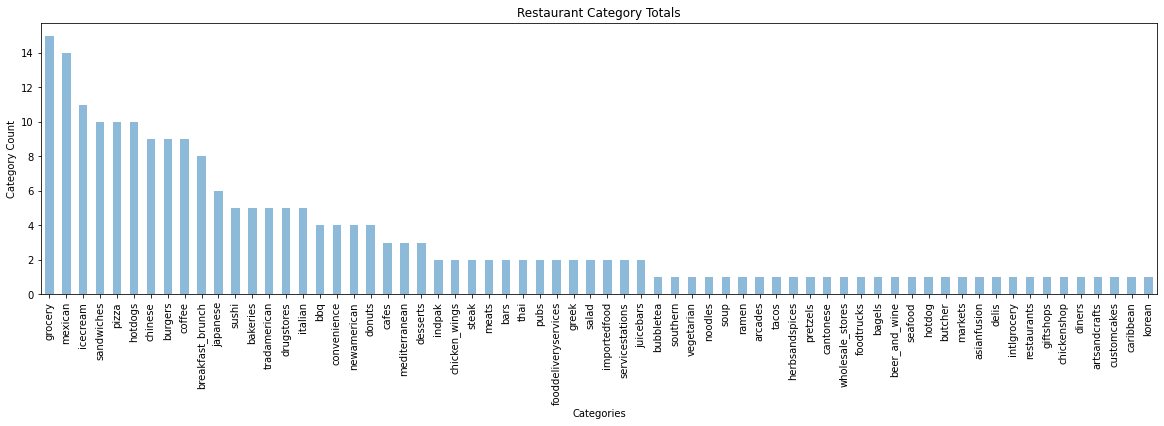

In [11]:
categories_bar= pd.DataFrame(category_count)
categories_bar.plot.bar(legend=False, alpha=0.5, align="center", figsize=(20,5))
plt.title('Restaurant Category Totals')
plt.xlabel('Categories')
plt.ylabel('Category Count')
plt.show()

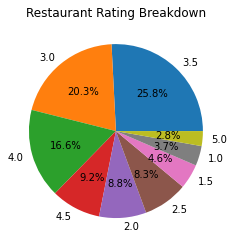

In [12]:
ratings_pie =pd.DataFrame(rating_count)
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%')
plt.title('Restaurant Rating Breakdown')
plt.show()